<a href="https://colab.research.google.com/github/nikdrako/Machine-learning-projects/blob/main/Homework5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv('winequality-red.csv',delimiter = ';')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


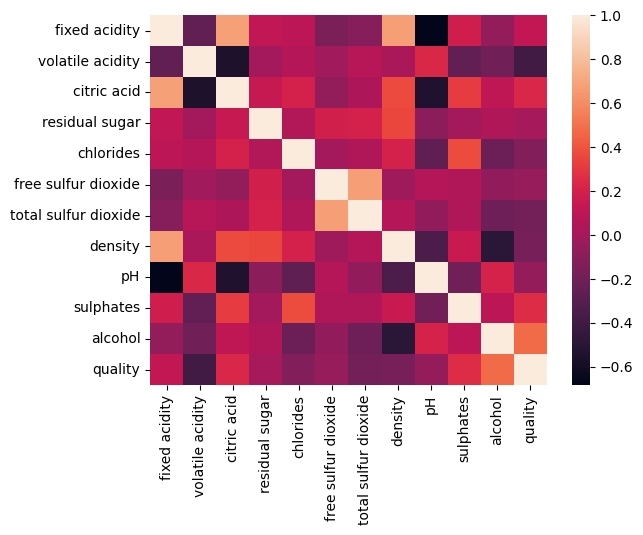

In [ ]:
corre_matr = df.corr()
sns.heatmap(corre_matr)
print(df.head())
corre_matr

Сульфурний діоксид можемо обєднати, оскільки він трохи корелюєтсья між собою, та побудуємо нову фічу - середнє значення між total та free. збережемо це нове значення також в фічу total.

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   total sulfur dioxide  density    pH  sulphates  alcohol  quality  
0                  22.5   0.9978  3.51       0.56      9.4        5  
1                  46.0   0.9968  3.20       0.68      9.8        5  
2                  34.5   0.9970  3.26       0.65      9.8        5  
3                  38.5   0.9980  3.16       0.58      9.8        6  
4                  22.5   0.9978  3.51       0.56      9.4        5  


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.131222,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,0.059205,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,0.013069,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.212521,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.039807,0.200632,-0.265026,0.371260,-0.221141,-0.128907
total sulfur dioxide,-0.131222,0.059205,0.013069,0.212521,0.039807,1.000000,0.052049,-0.035715,0.048067,-0.184362,-0.162895
density,0.668047,0.022026,0.364947,0.355283,0.200632,0.052049,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,-0.035715,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.048067,0.148506,-0.196648,1.000000,0.093595,0.251397
alcohol,-0.061668,-0.202288,0.109903,0.042075,-0.221141,-0.184362,-0.496180,0.205633,0.093595,1.000000,0.476166


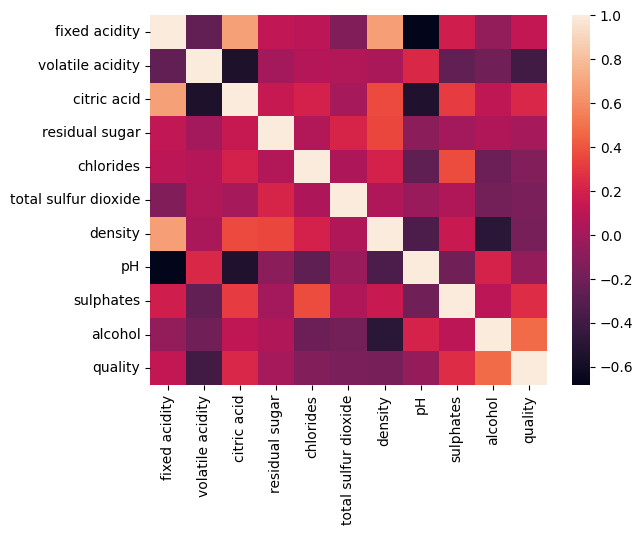

In [ ]:
df['total sulfur dioxide'] = (df['total sulfur dioxide']+df['free sulfur dioxide'])/2
df = df.drop(columns = 'free sulfur dioxide')
print(df.head())
corre_matr = df.corr()
sns.heatmap(corre_matr)
corre_matr

In [ ]:
df[['citric acid','fixed acidity']].corr()

,citric acid,fixed acidity
citric acid,1.000000,0.671703
fixed acidity,0.671703,1.000000


Кореляція в межах норм, також подивився там на значення і потреби  зі зміною вроді відсутні

ділимо датасет на фічі та таргет

In [ ]:
X = df.iloc[:,:-1]
y = df.quality

ділимо на тестову та тренувальну вибірки

In [ ]:
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3,random_state=42,stratify=y)

масштабуємо наші фічі

In [ ]:
scal=StandardScaler()
X_train_scaled=scal.fit_transform(X_train)
X_test_scaled=scal.transform(X_test)
X_train_scaled.mean()

-5.812449121951758e-15

Пробуємо звичайну лінійну регресію без гіперпараметрів

In [ ]:
reg = LinearRegression().fit(X_train_scaled,y_train)

In [ ]:
reg.score(X_train_scaled,y_train)

0.3465290365412247

In [ ]:
reg.score(X_test_scaled,y_test)

0.37199012469587134

Тепер переходимо на градієнтний спуск

In [ ]:
regressor= SGDRegressor(shuffle =True, random_state=42)

In [ ]:
regressor.fit(X_train_scaled, y_train)

SGDRegressor(random_state=42)

In [ ]:
regressor.score(X_train_scaled, y_train)

0.3458325134617375

In [ ]:
regressor.score(X_test_scaled, y_test)

0.3788093022947737

<Axes: >

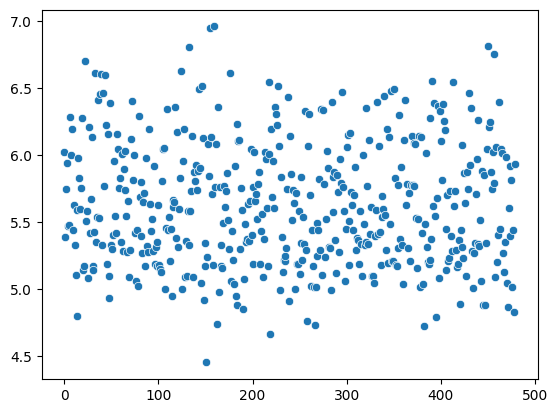

In [ ]:
y_pred = regressor.predict(X_test_scaled)
sns.scatterplot(y_pred)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)


0.4027359395387075

тепер перебираємо гіперпараметри для нашого градієнтного спуску

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'penalty':('l1', 'l2', 'elasticnet'),
              'alpha':[0.01,0.10,0.15,0.25],
              'fit_intercept': [True,False],
              'l1_ratio': [0.1,0.2,0.3,0.4,0.15],
              #'max_iter': [20000,100,1000,10], цікава спроба додати вибір ітерацій , спочатку видало що найкраща кількість ітерацій 10, коли добавив learning_rate, то комп завис((
              'learning_rate': ('constant','optimal','invscaling','adaptive')}
svc = SGDRegressor(random_state=42)
clf = GridSearchCV(svc, parameters,cv=5)
clf.fit(X_train_scaled,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stocha

GridSearchCV(cv=5, estimator=SGDRegressor(random_state=42),
             param_grid={'alpha': [0.01, 0.1, 0.15, 0.25],
                         'fit_intercept': [True, False],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.15],
                         'learning_rate': ('constant', 'optimal', 'invscaling',
                                           'adaptive'),
                         'penalty': ('l1', 'l2', 'elasticnet')})

In [ ]:
print(clf.best_params_)

{'alpha': 0.01, 'fit_intercept': True, 'l1_ratio': 0.1, 'learning_rate': 'optimal', 'penalty': 'elasticnet'}


In [ ]:
svss = SGDRegressor(alpha = 0.01, fit_intercept= True, l1_ratio = 0.1, penalty = 'elasticnet', random_state=17, learning_rate = 'optimal')
svss.fit(X_train_scaled, y_train)
svss.score(X_train_scaled, y_train)

0.3396994005397713

In [ ]:
svss.score(X_test_scaled, y_test)

0.3870511138419023

Загалом по цим моделям, то результати досить одинакові, відрізняються тільки на декілька сотих. проста лінійна регресія на тестових дає результат 0.37199012469587134 по коефіцієнту детермінації, стохастичний градієнтний спуск на тестових дає результат 0.3788093022947737, а з підбором гіперапарметрів 0.3870511138419023